## Jesús Daniel Martínez García A00833591

In [1]:
# Import drive to connect and interact with Google Drive (so we can import the data)
# Note: This may take a while, but remember to give permission
from google.colab import drive

drive.mount("/content/gdrive")
!pwd # Print working directory

Mounted at /content/gdrive
/content


In [2]:
# Navigate to the path where the dataset is stored and read the csv file
%cd "/content/gdrive/MyDrive/IA/NOTEBOOKS"
!ls # List files located in defined folder

/content/gdrive/MyDrive/IA/NOTEBOOKS
 bankloan.csv				'sesion5_actividad5_over_under_fitting_V02 (1).ipynb'
 Cancer_Data.csv			 TC3006C.M3.01.ETL.pdf
 evidencia1.ipynb			 TC3006C.M3.02.Tutorial.Numpy.ipynb
 hypothesis_function_alumno.ipynb	 TC3006C_M3_03_Tutorial_Pandas.ipynb
 iris.data				 TC3006C.M3.04.Tutorial.Scipy.ipynb
'linear_reg_gd1_alumno (1).ipynb'	 TC3006C_M3_05_Tutorial_Scikit_learn.ipynb
'log_reg_gd_V06_alumno (1).ipynb'	 TC3006C_M3_07_Tutorial_Seaborn.ipynb
'log_reg_multiclase_alumnos (2).ipynb'	 wine.data
'perceptron_and_or_xnor (1) (1).ipynb'	 wine.names
 score_updated.csv


In [1]:
import pandas as pd

# dataset de kaggle https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc
df = pd.read_csv('Cancer_Data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:

#Convertimos  variable categorica para que el modelo pueda manejarla.
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

df_x = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
           'compactness_mean', 'concavity_mean', 'concave points_mean']]

## Nuestra variable a predecir con la regresión logística será el diagnóstico (0 = Benigno, 1 = Maligno)
df_y = df['diagnosis']

In [7]:
## Aquí utilizaremos la función de train_test_split como la utilizada en la actividad de regresión logistica multiclase para separar nuestro datasets en datos de entrenamiento y prueba
##la función divide los datos en 80% entrenamiento y 20% prueba.

from sklearn.model_selection import train_test_split

#Esto nos servirá para ver si el modelo generaliza bien con otros datos

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [8]:
## Escalar las features nos permitira que el modelo trate a todas las features con igual de importancia

from sklearn.preprocessing import StandardScaler


sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)


#transform utilizda en los datos de prueba
X_test_scaled = sc.transform(X_test)


In [9]:
##inicializacion de theta y columna de 1sss

import numpy as np

# Inicialización del vector theta con valores random (incluyendo el término dell bias)


theta = np.random.randn(len(X_train_scaled[0]) + 1, 1)

# Añadir la columna de unos a X_train_scaled para incluir el bias en X_vect
X_vect = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_test_vect = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]


print(X_vect[:5])
print(X_vect.shape)

[[ 1.         -1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331
   0.71892128  2.82313451 -0.11914956]
 [ 1.          1.97409619  1.73302577  2.09167167  1.85197292  1.319843
   3.42627493  2.01311199  2.66503199]
 [ 1.         -1.39998202 -1.24962228 -1.34520926 -1.10978518 -1.33264483
  -0.30735463 -0.36555756 -0.69650228]
 [ 1.         -0.98179678  1.41622208 -0.98258746 -0.86694414  0.05938999
  -0.59678772 -0.82020317 -0.84511471]
 [ 1.         -1.11769991 -1.0102595  -1.12500192 -0.96594206  1.26951116
  -0.43900185 -0.98334145 -0.93059974]]
(455, 9)


In [10]:
##DEFINIMOS LAS FUNCIONES NECESARIAS PARA IMEPLEMENTAR LA REGRESIÓN LOGÍSTICA

import matplotlib.pyplot as plt


##funcion sigmoide convierte en un num entre 0 y 1
def sigmoid_function(X):
    return 1 / (1 + np.exp(-X))



##Regresión logística, utiliza gradient descent para ajustar las thetas, x son los features, y la label,
#alpha el learning reate y los epochs la cantidad de veces que se actulizarán los parametros
def log_regression(X, y, theta, alpha, epochs):
  y_ = np.reshape(y, (len(y), 1)) # shape (150,1)
  N = len(X)
  avg_loss_list = []
  for epoch in range(epochs):
    sigmoid_x_theta = sigmoid_function(X_vect.dot(theta)) # shape: (150,5).(5,1) = (150,1)
    grad = (1/N) * X_vect.T.dot(sigmoid_x_theta - y_) # shapes: (5,150).(150,1) = (5, 1)
    theta = theta - (alpha * grad)
    hyp = sigmoid_function(X_vect.dot(theta)) # shape (150,5).(5,1) = (150,1)
    avg_loss = -np.sum(np.dot(y_.T, np.log(hyp) + np.dot((1-y_).T, np.log(1-hyp)))) / len(hyp)
    if epoch % 1000 == 0:
      print('epoch: {} | avg_loss: {}'.format(epoch, avg_loss))

    avg_loss_list.append(avg_loss)
  plt.plot(np.arange(1, epochs), avg_loss_list[1:], color='red')
  plt.title('Cost function')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.show()
  return theta


epoch: 0 | avg_loss: 160.78518868520163
epoch: 1000 | avg_loss: 30.879753090433926
epoch: 2000 | avg_loss: 20.545961872651784
epoch: 3000 | avg_loss: 16.674093161543798
epoch: 4000 | avg_loss: 14.77269821993411
epoch: 5000 | avg_loss: 13.66235349119574
epoch: 6000 | avg_loss: 12.929316706912438
epoch: 7000 | avg_loss: 12.405610471047133
epoch: 8000 | avg_loss: 12.012424051663658
epoch: 9000 | avg_loss: 11.707349536247623


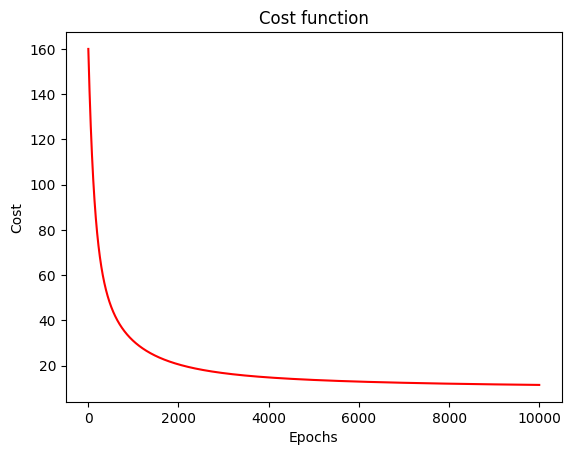

In [11]:
# Entrenar el modelo

alpha = 0.01
epochs = 10000

theta_final = log_regression(X_vect, y_train, theta, alpha, epochs)


In [12]:

def predict(X, theta):
    probabilities = sigmoid_function(np.dot(X, theta))
    return probabilities >= 0.5  # Si la probabilidad es mayor o igual a 0.5, predice 1, sino nel 0



# Asegurarnos de q theta_final tiene el tipo de dato correcto
theta_final = theta_final.astype(float)

# Hacer predicciones con el conjunto de prueba
y_pred_test = predict(X_test_vect, theta_final)

# Convertir las predicciones booleanas en 0 y 1 para calcular las métricas
y_pred_test = y_pred_test.astype(int)

# Aplanar los arrays si tibnes multidimension
y_test = np.array(y_test).ravel()
y_pred_test = np.array(y_pred_test).ravel()

# Calcular la precisión manualmente
accuracy_manual = np.mean(y_test == y_pred_test)
print(f'Precisión del modelo: {accuracy_manual * 100:.2f}%')



# Usa pandas para generar la matriz de confusión
conf_matrix = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred_test, name='Predicted'))


print(conf_matrix)


accuracy = np.mean(y_test == y_pred_test)


print(f'Exactitud calculada.   : {accuracy * 100:.2f}%')

Precisión del modelo: 95.61%
Predicted   0   1
Actual           
0          69   2
1           3  40
Exactitud calculada.   : 95.61%


##Reporte.

Para el dataset de cáncer data buscamos predecir el label de diagnosis donde m representaba cáncer maligno y b cáncer benigno. Se implementa el modelo de regresión logística al ser un algoritmo efectivo para el problema que representa, viendo que es una clasificación binaria.

Primero se cargan los datos utilizando pandas, se separan las features y labels así como transformar la label categórica a numérica con 0 para benigno y 1 para maligno, lo que facilitaría el uso en el modelo.

Después dividimos los datos de entrenamiento: 80% training y 20% prueba. Esto lo hacemos para evaluar el modelo con datos que no ha visto antes y validar si generaliza o no.

 Se aplicó un standar scaler, que básicamente asegura que todas las features tengan el mismo peso en el entrenamiento y para el de prueba se escalan usando lo mismo que se calculó en los de entrenamiento, uno con fit_transform y el otro solo con transform.

 En las funciones relevantes para la regresión logística se definió la sigmoide y la función para entrenar el modelo utilizando el gradient descent que ajusta las thetas, alpha sería el learning rate, que contra que tran rapido se ajustan las thetas en cada iteración, después los epochs que es la cantidad de veces que se van a actualizar los parametros del modelo.

 Se crea una función predict que utiliza la funcion sigmoide que calcule las probabilidades de que un diagnotico sea maligno (1), si es mayor o igual a 0.5, si es menor, predice benigno (0).

 Se hacen las predicciones sobre los datos de test y se comparan. El accuracy ahí nos da cuántas veces el modelo predijo correctamente, en este caso obtuvo un 96.4%. También, se implementó una matriz de confusión que muestra cómo se comportó el modelo con más detalle: verdaderos negativos (70), es decir, que el modelo predijo bien que 70 personas no tenían cáncer maligno. Falsos positivos (1) el modelo solo predijo mal que una persona tenía cáncer maligno, cuando no. Verdaderos positivos (40), el modelo predijo correctamente que esa cantidad tenía cáncer maligno. Falsos negativos (3), el modelo dio mal que 3 personas no tenían cáncer maligno, cuando sí.

En cuanto a los hiperparámetros, se decidió utilizar la función de grid search, específicamente para ajustar el learning rate y los epochs, durante estas pruebas aunque la función si identificaba una combinación como la mejor (alpha = 0.001 y epochs = 5000) en cuanto a precisión, el rendimiento del modelo cuando use estos parámetros no fue mejor que utilizando otros hiperparámetros que la función no sugería, probablemente debido a un error en la implementación. Decidí utilizar alpha = 0.01 y epochs = 10000 o 5000, viendo ninguna diferencia variando estos epochs y así el modelo se mostraba mejor. Considero que es un área de oportunidad y un aprendizaje importante obtenido al realizar la práctica, pues concluí que la selección de hiperparámetros es un proceso de experiencia, prueba y error.

En conclusión, se pudo aplicar la regresión logística aprendida en clase y empleada en diversas actividades en un dataset nuevo, en este caso para predecir si un cáncer es benigno o maligno, se utilizaron procesos de escalamiento de features y una correcta división de los datos para asegurar un entrenamiento correcto. Se evaluó el modelo y con la matriz de confusión se mostró que predice bien en la mayoría de casos.

---




